#### K-MEANS 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/Administrator/2023_Data_Mining_Coffee_Quality_Dataset/cleaned_data.csv")

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
X=data.drop("Total.Cup.Points",axis=1)


In [5]:
feature_names=X.columns

In [6]:
X.head()

,Species,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,0,8,115,5,5,4,0,0.0,2,0,2075.0
1,0,8,115,5,15,4,0,0.0,2,1,2075.0
2,0,9,122,3,2,4,0,0.0,2,0,1700.0
3,0,8,226,5,5,0,0,0.0,2,2,2000.0
4,0,8,115,5,15,4,0,0.0,2,2,2075.0


In [7]:
X.describe()

,Species,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.00000,1326.000000,1326.000000
mean,0.021116,13.903469,177.802413,4.585219,10.549774,3.107843,0.474359,0.174208,1.78733,3.481900,1780.296794
std,0.143826,10.336440,94.787708,1.832180,9.258641,1.596595,2.551600,0.835422,0.54255,5.082643,7926.787140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,3.250000,121.000000,3.000000,5.000000,3.000000,0.000000,0.000000,2.00000,0.000000,1200.000000
50%,0.000000,11.000000,158.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.00000,2.000000,1450.000000
75%,0.000000,20.000000,262.000000,6.000000,15.000000,4.000000,0.000000,0.000000,2.00000,4.000000,1775.030545
max,1.000000,35.000000,355.000000,9.000000,28.000000,4.000000,63.000000,11.000000,2.00000,47.000000,190164.000000


In [8]:
#imamo dosta kategorickih atributa
for x in feature_names:
    print(x,X[x].unique())

Species [0 1]
Country.of.Origin [ 8  9  0 24 31 32 13  2  4 19 30 11 27 21 28 15 29  3 22 23  7 14  6 33
 10  1 34 25 26 17 16 35 20 18  5 12]
Region [115 122 226 227 279  13 155 289 334 337 109 258 326 269 283 142  73 165
 314 321 201  53 288 207 216  97 309 152 278 215  95  30   1   6  36  96
  14  19 154  34 121 141 323  44 225 263 169 149 229  15  80 297 316 111
 186  67 181  69  93 304 176 259 137 298   5  78 292 103 180 230 134 311
 196 315  41 124 135 104 189 303 290 235 195 296 167  45 160 313 353  54
 206  12 268 256 158 146 254 281 212  47 280  16 151 187 112 198   4 204
   8 264 106  27  55 166 351 346 327 157 163  46 239 233  40  88 348 322
 331 120 243 185 123  94 246  57 211  24  20  65 310  29 145 208 113  56
 305 148 272  38  79 344  98 108 192  81  83 182 153 307 248 251 190  51
  58 260  89 147 318 117 352 287  21 161 178  28 350  33  18  90 159  99
 110 319  26 262 266 102 349  35 183 202 282 228 191 143 162 197 234 172
   0  50   2 127 217  72  23 340  74  17 232 34

Ima dosta kategorickih atributa, neke bi mozda bilo najbolje izostaviti poput kolone Region jer ima previse kategorija, a kad bih uradila one hot encoding skup bi patio od dimenzionalnosti 

In [9]:
X.drop(labels=["Region","Country.of.Origin","Variety","Processing.Method"],axis=1,inplace=True)
feature_names=X.columns

Od pravih kategorickih atributa su ostali Species (samo 1 i 0 tako da necu dirati) i Color (vrednosti 0, 1, 2)

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown="ignore")
encoder_df=pd.DataFrame(encoder.fit_transform(X[["Color"]]).toarray())


In [11]:
X=X.join(encoder_df)
X.head()

,Species,Harvest.Year,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters,0,1,2
0,0,5,0,0.0,2,0,2075.0,0.0,0.0,1.0
1,0,5,0,0.0,2,1,2075.0,0.0,0.0,1.0
2,0,3,0,0.0,2,0,1700.0,0.0,0.0,1.0
3,0,5,0,0.0,2,2,2000.0,0.0,0.0,1.0
4,0,5,0,0.0,2,2,2075.0,0.0,0.0,1.0


In [12]:
X.drop("Color",axis=1,inplace=True)


In [13]:
X.rename(columns={0 : "Color_0", 1: "Color_1", 2 : "Color_2"},inplace=True)
X.head()

,Species,Harvest.Year,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters,Color_0,Color_1,Color_2
0,0,5,0,0.0,0,2075.0,0.0,0.0,1.0
1,0,5,0,0.0,1,2075.0,0.0,0.0,1.0
2,0,3,0,0.0,0,1700.0,0.0,0.0,1.0
3,0,5,0,0.0,2,2000.0,0.0,0.0,1.0
4,0,5,0,0.0,2,2075.0,0.0,0.0,1.0


In [14]:
feature_names=X.columns

Normalizujmo podatke

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
X=pd.DataFrame(scaler.fit_transform(X),columns=feature_names)


In [17]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

In [18]:
#Pogledajmo kako se ponasaju SSE i koeficijent senke 
sse=[]
scoef=[]

for k in range(2,10):
    km=KMeans(n_clusters=k,n_init=10)
    km.fit(X)
    sse.append(km.inertia_)
    scoef.append(silhouette_score(X,km.labels_))



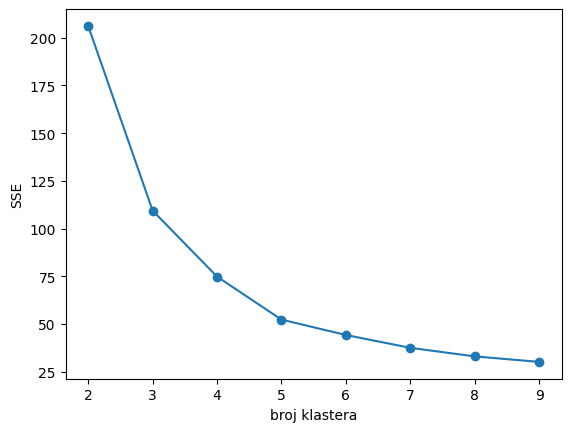

In [19]:
plt.plot([i for i in range(2,10)], sse,marker='o')
plt.xlabel("broj klastera")
plt.ylabel("SSE")

plt.show()

Ocekivano da SSE opada sa porastom broja klastera

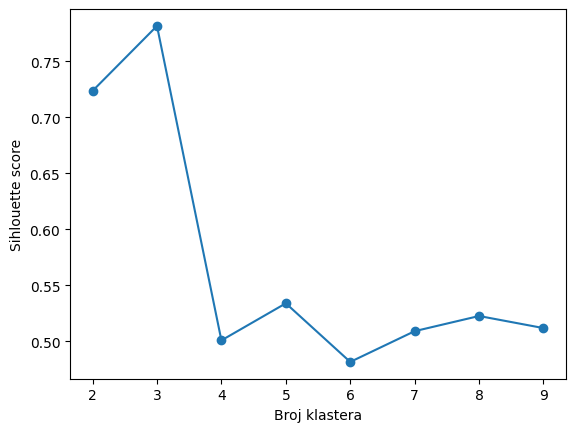

In [20]:
plt.plot([i for i in range(2,10)],scoef,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

Koristeci pravilo lakta mozemo da zakljucimo da je optimalan broj klastera 4

In [21]:
from sklearn.decomposition import PCA
#X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
pca = PCA(2)
X = pca.fit_transform(X)

In [22]:
pca.explained_variance_ratio_[0:2].sum()

0.7629737129068487

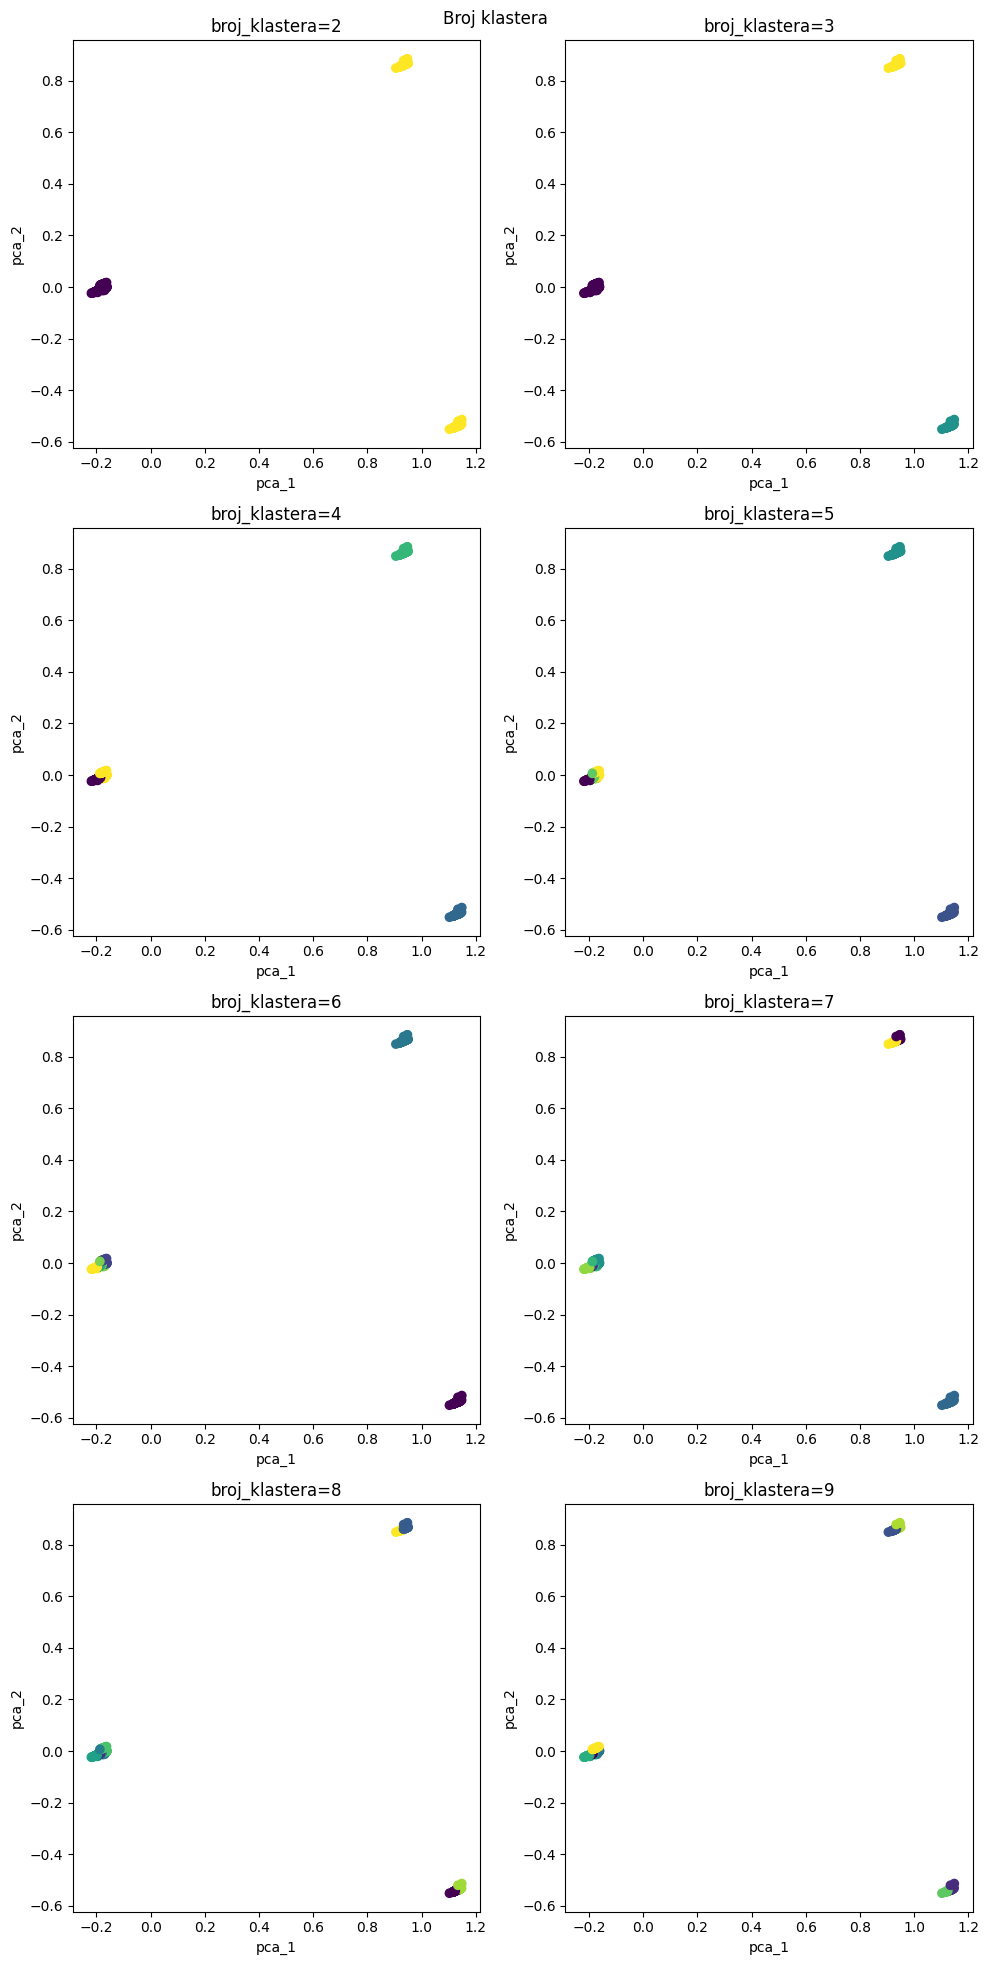

In [23]:
#Vizuelizujmo 
ks = [i for i in range(2, 10)]
sse = []
silh = []
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
fig.suptitle("Broj klastera")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)

    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_1")
    ax.set_ylabel("pca_2")

    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()

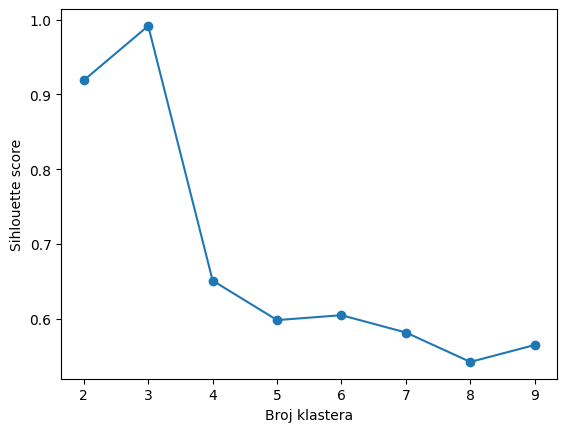

In [24]:
plt.plot([i for i in range(2,10)],silh,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

In [25]:
#Zelim da probam sa vecim brojem atributa, ali kako su kategoricki ne znam kolko ce dobro proci jer cu morati da smanjim dimenzionalnost sa PCA

In [26]:
X1=data
X1.head()

,Species,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters,Total.Cup.Points
0,0,8,115,5,5,4,0,0.0,2,0,2075.0,9.0
1,0,8,115,5,15,4,0,0.0,2,1,2075.0,9.0
2,0,9,122,3,2,4,0,0.0,2,0,1700.0,9.0
3,0,8,226,5,5,0,0,0.0,2,2,2000.0,9.0
4,0,8,115,5,15,4,0,0.0,2,2,2075.0,9.0


In [27]:
X1=data.drop(labels=["Total.Cup.Points","Region"],axis=1)
feature_names=X1.columns

In [28]:
#One hot encoding
hotencoder=OneHotEncoder(feature_name_combiner="concat")
encoder_df=pd.DataFrame(hotencoder.fit_transform(X1[["Country.of.Origin","Variety","Processing.Method","Color"]]).toarray(),columns=hotencoder.get_feature_names_out())


In [29]:
hotencoder.get_feature_names_out()

array(['Country.of.Origin_0', 'Country.of.Origin_1',
       'Country.of.Origin_2', 'Country.of.Origin_3',
       'Country.of.Origin_4', 'Country.of.Origin_5',
       'Country.of.Origin_6', 'Country.of.Origin_7',
       'Country.of.Origin_8', 'Country.of.Origin_9',
       'Country.of.Origin_10', 'Country.of.Origin_11',
       'Country.of.Origin_12', 'Country.of.Origin_13',
       'Country.of.Origin_14', 'Country.of.Origin_15',
       'Country.of.Origin_16', 'Country.of.Origin_17',
       'Country.of.Origin_18', 'Country.of.Origin_19',
       'Country.of.Origin_20', 'Country.of.Origin_21',
       'Country.of.Origin_22', 'Country.of.Origin_23',
       'Country.of.Origin_24', 'Country.of.Origin_25',
       'Country.of.Origin_26', 'Country.of.Origin_27',
       'Country.of.Origin_28', 'Country.of.Origin_29',
       'Country.of.Origin_30', 'Country.of.Origin_31',
       'Country.of.Origin_32', 'Country.of.Origin_33',
       'Country.of.Origin_34', 'Country.of.Origin_35', 'Variety_0',
       

In [30]:
X1=X1.join(encoder_df)

In [31]:
X1.drop(labels=["Country.of.Origin","Variety","Processing.Method","Color"],axis=1,inplace=True)
X1.head()

,Species,Harvest.Year,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters,Country.of.Origin_0,Country.of.Origin_1,Country.of.Origin_2,Country.of.Origin_3,...,Variety_27,Variety_28,Processing.Method_0,Processing.Method_1,Processing.Method_2,Processing.Method_3,Processing.Method_4,Color_0,Color_1,Color_2
0,0,5,0,0.0,0,2075.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,5,0,0.0,1,2075.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,3,0,0.0,0,1700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,5,0,0.0,2,2000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,5,0,0.0,2,2075.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
#normalizacija
feature_names=X1.columns
X1=pd.DataFrame(scaler.fit_transform(X1),columns=feature_names)

In [33]:
#PCA
X1=pd.DataFrame(pca.fit_transform(X1))

In [34]:
pca.explained_variance_ratio_[0:2].sum()

0.28991280492952054

Objasnili smo jako udeo ukupne varijanse, imali smo mnogo binarnih atributa

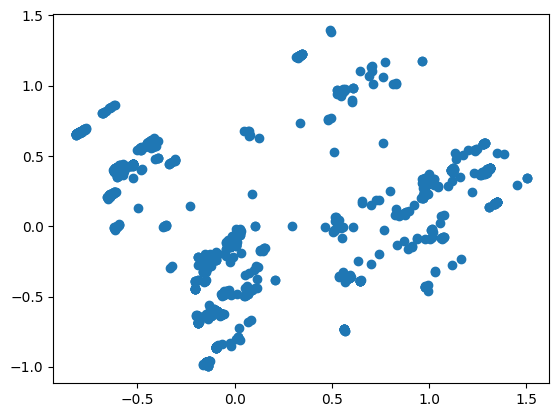

In [35]:
#X1.head()
_=plt.scatter(X1.iloc[:,0],X1.iloc[:,1])

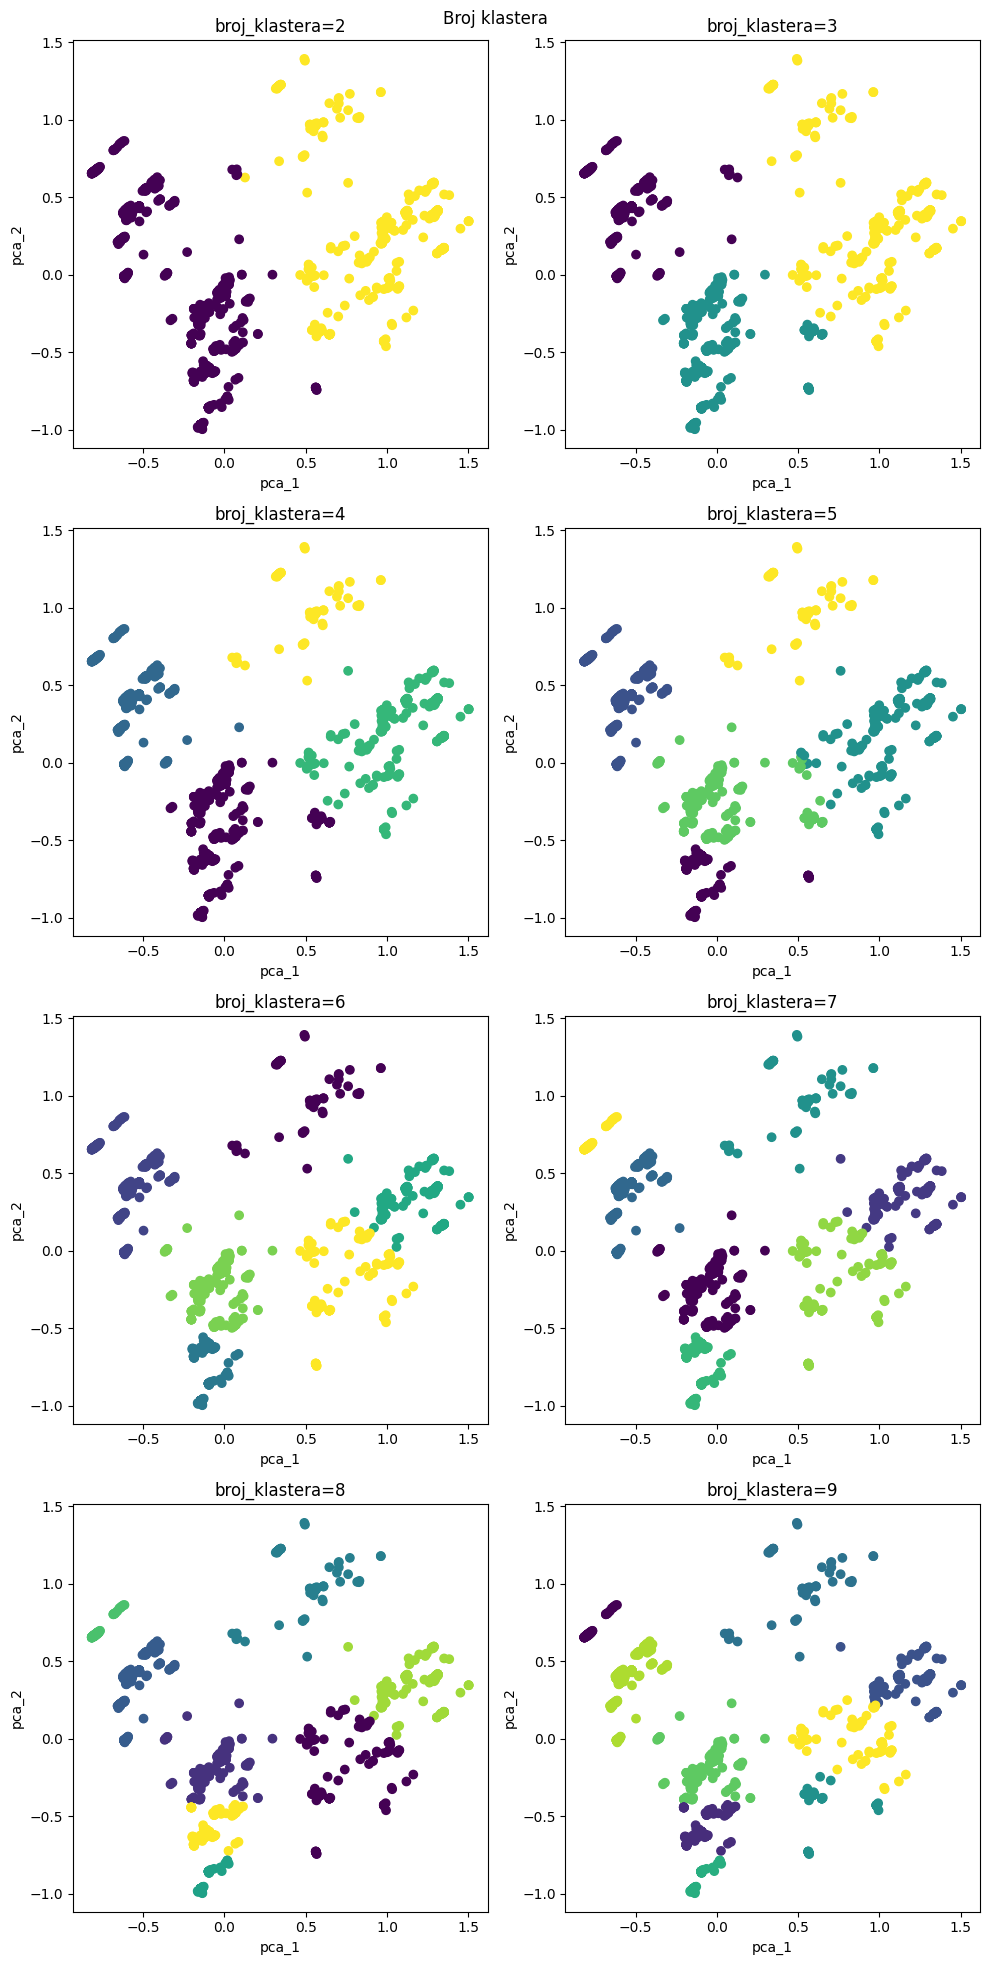

In [36]:
#KMeans
ks = [i for i in range(2, 10)]
sse = []
silh = []
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
fig.suptitle("Broj klastera")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X1)

    ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=kmeans.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_1")
    ax.set_ylabel("pca_2")

    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X1, kmeans.labels_))

plt.tight_layout()
plt.show()

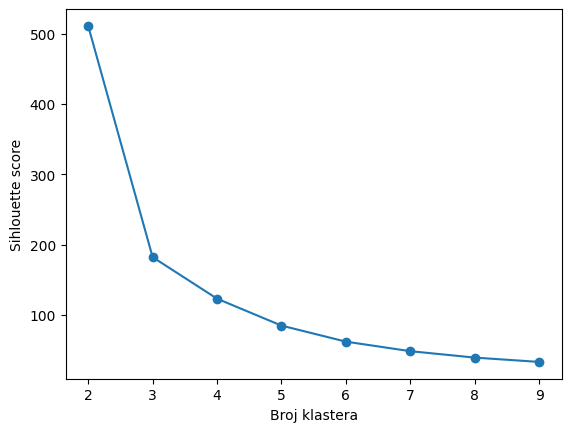

In [37]:
plt.plot([i for i in range(2,10)],sse,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

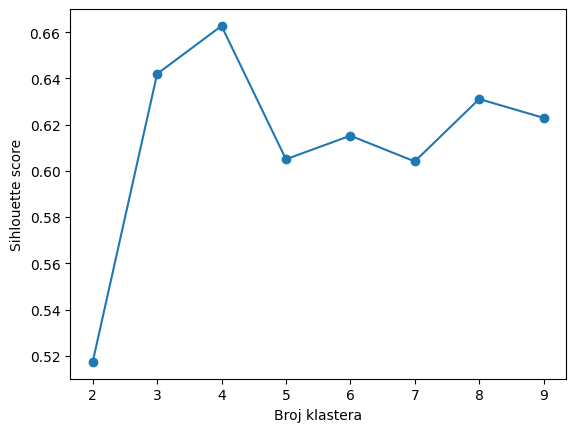

In [38]:
plt.plot([i for i in range(2,10)],silh,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

In [39]:
#optimalno 5

#### Fuzzy C-Means

In [40]:
from fcmeans import FCM

In [41]:
fcm = FCM(n_clusters=5, m=3)
fcm.fit(X1.to_numpy())

In [42]:
centers=fcm.centers


In [43]:
labels=fcm.predict(X1.to_numpy())

In [44]:
for c in np.unique(labels):
    elems = X1[labels == c]
    print(elems)

             0         1
47   -0.797152  0.669646
54   -0.676728  0.808100
84   -0.785307  0.680434
97   -0.778418  0.683093
106  -0.776472  0.688685
...        ...       ...
1130 -0.785041  0.679643
1167 -0.814669  0.652154
1171 -0.796944  0.668808
1178 -0.796674  0.668025
1242 -0.802706  0.663039

[146 rows x 2 columns]
             0         1
0    -0.579304  0.423636
7    -0.603646  0.403540
8    -0.603646  0.403540
13   -0.535912  0.429898
14   -0.603110  0.401965
...        ...       ...
1316 -0.599831  0.413228
1317 -0.600096  0.414022
1318 -0.430857  0.613587
1321 -0.459366  0.567064
1322 -0.459622  0.567872

[258 rows x 2 columns]
             0         1
1    -0.150588 -0.251477
4    -0.150320 -0.252265
6    -0.008155 -0.114320
11   -0.146091 -0.291943
12   -0.146091 -0.291944
...        ...       ...
1238 -0.203454 -0.443862
1249  0.089274 -0.454883
1254 -0.203454 -0.443862
1293 -0.145579 -0.220607
1306 -0.160177 -0.236484

[264 rows x 2 columns]
             0         1
3  

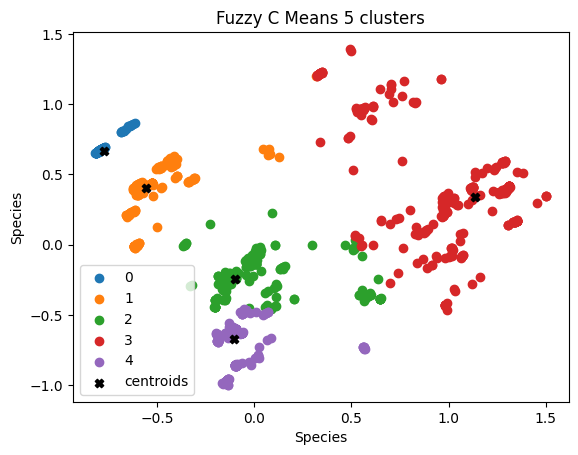

In [45]:
#Vizuelizacija

for c in np.unique(labels):
    elems = X1[labels == c]
    plt.scatter(elems[0], elems[1], label=c)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[0])
plt.title('{} {} clusters'.format("Fuzzy C Means", len(centers)))
plt.legend()
plt.show()

Slican rezultat kao i gore

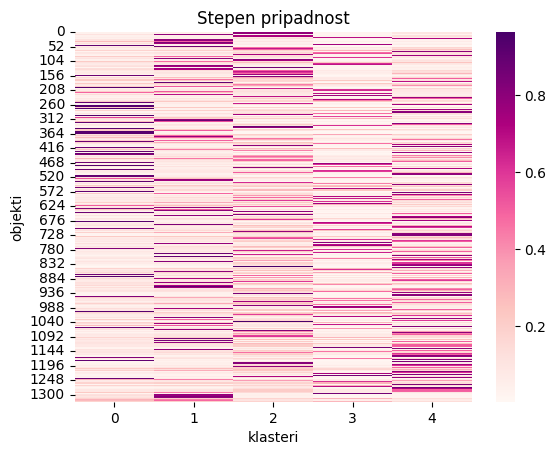

In [46]:
# soft clustering
import seaborn as sns
sns.heatmap(fcm.soft_predict(X1.to_numpy()), cmap='RdPu')
plt.title("Stepen pripadnost")
plt.xlabel('klasteri')
plt.ylabel('objekti')
plt.show()

In [49]:
X1['labels'] = labels
silhouette_score(X1, X1['labels'])

0.7915631836127542